In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report,RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_validate

In [19]:
data = pd.read_csv('diabetes.csv')

In [20]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
data.shape

(768, 9)

In [23]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

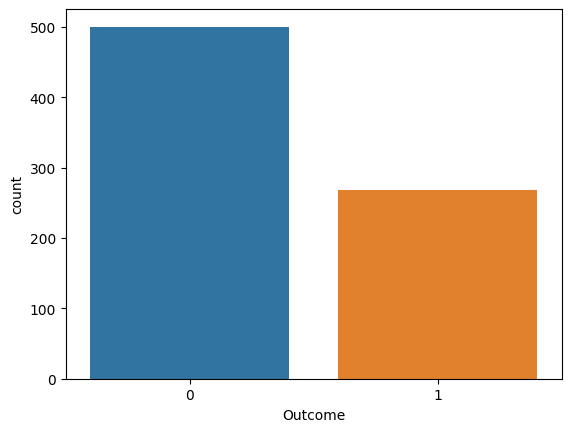

In [24]:
sns.countplot(x = 'Outcome', data = data)
plt.show()

In [25]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


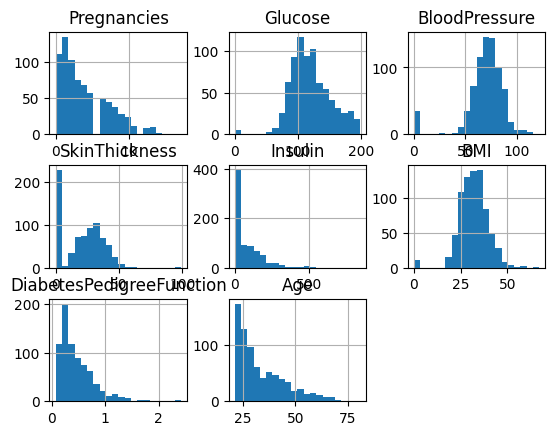

In [26]:
def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)
    
cols = [col for col in data.columns if 'Outcome' not in col]
plot_numerical_col(data, cols)
    

In [27]:
def target_vs_features(dataframe, numerical_col):
    for col in numerical_col:
        print(dataframe.groupby('Outcome')[col].agg('mean'))

In [28]:
target_vs_features(dataframe=data, numerical_col=cols)

Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64
Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64
Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64
Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64
Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64
Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64
Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64
Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64


In [29]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [36]:
def outlier_thresholds(dataframe, col_name, q1 = 0.05, q3 = 0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    inter_quantile = quartile3 - quartile1
    
    low = quartile1 - 1.5 * inter_quantile
    up = quartile3 + 1.5 * inter_quantile
    
    return low, up

In [37]:
def check_outlier(dataframe, col_name):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up) | (dataframe[col_name] < low)].any(axis=None):
        return True
    else:
        return False

In [38]:
for col in cols:
    print(col, check_outlier(data, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False


In [40]:
def replace_with_thresholds(dataframe,col_name ):
    low, up = outlier_thresholds(dataframe, col_name)
    dataframe.loc[(dataframe[col_name] > up) , col_name] = up
    dataframe.loc[(dataframe[col_name] < low), col_name] = low
    return dataframe

In [41]:
replace_with_thresholds(data, 'Insulin')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0.0,33.6,0.627,50,1
1,1,85,66,29,0.0,26.6,0.351,31,0
2,8,183,64,0,0.0,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,0.0,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,0,0.0,30.1,0.349,47,1


In [44]:
for col in cols:
    data[col] = RobustScaler().fit_transform(data[[col]])

In [45]:
X = data.drop(columns = 'Outcome', axis = 1)
Y= data[['Outcome']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

model = LogisticRegression().fit(X_train, y_train)

c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
model.coef_

array([[ 0.32079776,  1.3668517 , -0.2370145 ,  0.0917563 , -0.22050186,
         0.92814903,  0.2615771 ,  0.61259156]])

In [47]:
model.intercept_

array([-1.2017121])

In [48]:
y_pred = model.predict(X_test)

In [49]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [50]:
y_test

,Outcome
668,0
324,0
624,0
690,0
473,0
...,...
355,1
534,0
344,0
296,1


In [54]:
y_pred[0:10]  

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [55]:
y_test[0:10]

,Outcome
668,0
324,0
624,0
690,0
473,0
204,0
97,0
336,0
568,0
148,0


In [62]:
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f')
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score : {0}'.format(acc), size = 10)
    plt.show()

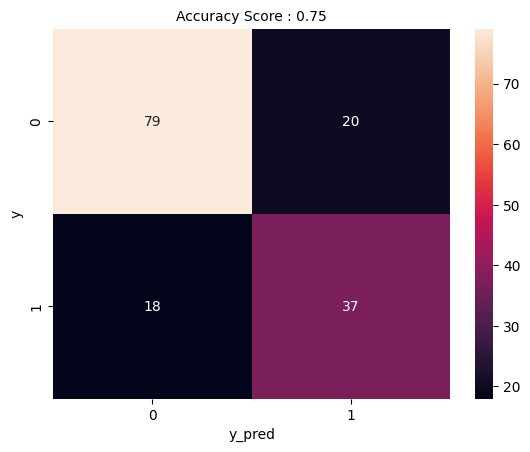

In [63]:
plot_confusion_matrix(y_test, y_pred)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [68]:
model2 = LogisticRegression().fit(X,Y)

c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
cv = cross_validate(model, 
                    X,Y,
                    cv = 10,
                    scoring = ['accuracy', 'precision','recall','f1','roc_auc'])

c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\s7522\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

In [71]:
cv['test_accuracy'].mean()

0.7721804511278195

In [72]:
cv

{'fit_time': array([0.02034092, 0.00836015, 0.0083487 , 0.01025152, 0.01216459,
        0.01029158, 0.00824094, 0.01013947, 0.0133152 , 0.00990582]),
 'score_time': array([0.02957654, 0.03183889, 0.03177428, 0.03302097, 0.03136301,
        0.02385259, 0.02164555, 0.02419209, 0.02945018, 0.02469015]),
 'test_accuracy': array([0.72727273, 0.77922078, 0.80519481, 0.71428571, 0.75324675,
        0.75324675, 0.80519481, 0.80519481, 0.75      , 0.82894737]),
 'test_precision': array([0.61538462, 0.77777778, 0.77272727, 0.6       , 0.75      ,
        0.7       , 0.77272727, 0.8       , 0.68421053, 0.84210526]),
 'test_recall': array([0.59259259, 0.51851852, 0.62962963, 0.55555556, 0.44444444,
        0.51851852, 0.62962963, 0.59259259, 0.5       , 0.61538462]),
 'test_f1': array([0.60377358, 0.62222222, 0.69387755, 0.57692308, 0.55813953,
        0.59574468, 0.69387755, 0.68085106, 0.57777778, 0.71111111]),
 'test_roc_auc': array([0.78148148, 0.82666667, 0.84074074, 0.77555556, 0.81185185,
 

In [74]:
print(cv['test_precision'].mean())
print(cv['test_recall'].mean())
print(cv['test_f1'].mean())

0.7314932728090622
0.5596866096866095
0.6314298154545237
